# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [ ]:
data.head()

# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [16]:
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [17]:
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
X = np.array(data.drop('Price',axis=1))
Y = np.array(data['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: -0.08285088491155834
RMSE: 124.30691131664412


In [23]:
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.5338962954978708
RMSE: 104.32331103627705


In [24]:
print("Parametry modelu:")
print(f"Váhy: {lr.coef_}")
print(f"Bias: {lr.intercept_}")

Parametry modelu:
Váhy: [0.3312876]
Bias: 1120.9126060444926


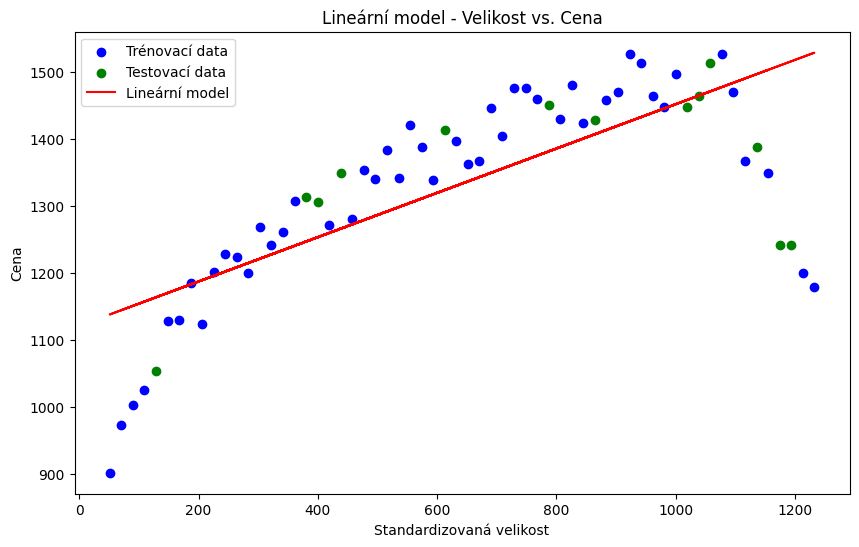

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Trénovací data')
plt.scatter(X_test, Y_test, color='green', label='Testovací data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Lineární model')
plt.xlabel('Standardizovaná velikost')
plt.ylabel('Cena')
plt.title('Lineární model - Velikost vs. Cena')
plt.legend()
plt.show()

In [26]:
train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)
print(f"\nSkóre modelu (R^2):")
print(f"Trénovací data: {train_score:.4f}")
print(f"Testovací data: {test_score:.4f}")



Skóre modelu (R^2):
Trénovací data: 0.5339
Testovací data: -0.0829


# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?